In [1]:
!pip install -qq -U datasets==2.16.0


In [2]:
!pip install diffusers[training]==0.25.0
!pip install diffusers==0.25.0
!pip install transformers==4.31.0
!pip install accelerate==0.20.4
!pip install bitsandbytes==0.37.1
!pip install git+https://github.com/huggingface/peft

ERROR: Could not find a version that satisfies the requirement accelerate==0.20.4 (from versions: 0.0.1, 0.1.0, 0.2.0, 0.2.1, 0.3.0, 0.4.0, 0.5.0, 0.5.1, 0.6.0, 0.6.1, 0.6.2, 0.7.0, 0.7.1, 0.8.0, 0.9.0, 0.10.0, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.13.2, 0.14.0, 0.15.0, 0.16.0, 0.17.0, 0.17.1, 0.18.0, 0.19.0, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.22.0, 0.23.0, 0.24.0, 0.24.1, 0.25.0, 0.26.0, 0.26.1, 0.27.0, 0.27.1, 0.27.2, 0.28.0, 0.29.0, 0.29.1, 0.29.2, 0.29.3, 0.30.0rc0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.32.1)
ERROR: No matching distribution found for accelerate==0.20.4
  Cloning https://github.com/huggingface/peft to /tmp/pip-req-build-hybt244m
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft /tmp/pip-req-build-hybt244m
  Resolved https://github.com/huggingface/peft to commit ba75bb14d115dfdff3294674d82d8097319ed74e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) .

/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new down

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


  0%|          | 0/1000 [00:00<?, ?it/s]

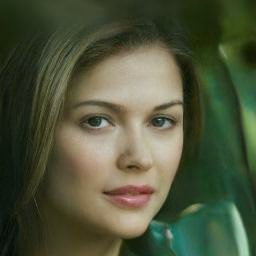

In [3]:
!pip install datasets
!pip install --upgrade pyarrow
!pip install diffusers
import torch
import torchvision
from datasets import load_dataset
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from diffusers import DDPMPipeline, DDIMScheduler, UNet2DModel, DDPMScheduler
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_id = "google/ddpm-celebahq-256"
pipeline = DDPMPipeline.from_pretrained(model_id)
pipeline.to(device)

generated_image = pipeline().images[0]
generated_image

In [4]:
img = torchvision.transforms.ToTensor()(generated_image)
type(img)

torch.Tensor

In [5]:
img.shape

torch.Size([3, 256, 256])

In [6]:
def show_images(x):
  """Given a batch of images x, make a grid and convert to pIL"""
  grid = torchvision.utils.make_grid(x)
  grid_im = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
  grid_img = Image.fromarray(np.array(grid_im).astype(np.uint8))
  return grid_img

def display_sample(sample, i):
  image_processed = sample.cpu().permute(0, 2, 3, 1)
  image_processed = (image_processed + 1.0) * 127.5
  image_prcessed = image_processed.numpy().astype(np.uint8)

  image_pil = PIL.Image.fromarray(image_processed[0])
  display(f"Image at step {i}")
  display(image_pil)

model = UNet2DModel.from_pretrained(model_id)
scheduler = DDPMScheduler.from_pretrained(model_id)
scheduler.set_timesteps(num_inference_steps=50)
scheduler.timesteps



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [7]:
torch.randn?


In [8]:
torch.manual_seed(1)

image = torch.randn(
    1, model.config.in_channels, model.config.sample_size, model.config.sample_size
)

image.shape

torch.Size([1, 3, 256, 256])

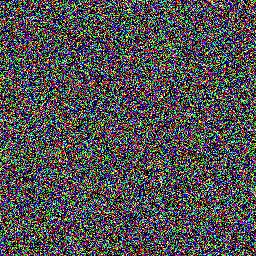

In [9]:
show_images(image)

In [11]:
with torch.no_grad():
  noise_prediction = model(sample=image, timestep=980).sample

noise_prediction.shape


torch.Size([1, 3, 256, 256])